In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 3

In [9]:
import csv
import gc
def get_data(directory, file_list, chunksize, data_type_list = None, use_col_list = None):
    # type: (str, list, list, list) -> pd.DataFrame
    """
    :param directory: input directory location
    :param file_list: list of files to read
    :param data_type_list: list of data types for each file (ex. int, str, etc)
    :param use_col_list: list of columns to read from
    :return: dataframe of all files
    """

    data = None
    for i, file_name in enumerate(file_list):
        #print (file_name)
        subset = None
        for j, chunk in enumerate(
                pd.read_csv(directory + file_name, chunksize=chunksize, low_memory=False, index_col=0,  nrows=50000)):
            #print (j)
            if subset is None:
                subset = chunk.copy()
            else:
                subset = pd.concat([subset, chunk])
            del chunk
            gc.collect()
        if data is None:
            data = subset.copy()
        else:
            data = pd.merge(data, subset.copy(), on="Id")
        del subset
        gc.collect()

    return data

In [10]:
X_train = get_data('D:/Project/Sample data/', ['train_numeric_5.csv'], 10000)
train = X_train
columns = X_train.drop(["Response"], axis=1).columns
print(columns)
# frac = float(sys.argv[1])
# num = int(sys.argv[2])
# print('frac:', frac)
# print('num:', num)

Index(['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8', 'L0_S0_F10',
       'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16', 'L0_S0_F18',
       ...
       'L3_S50_F4243', 'L3_S50_F4245', 'L3_S50_F4247', 'L3_S50_F4249',
       'L3_S50_F4251', 'L3_S50_F4253', 'L3_S51_F4256', 'L3_S51_F4258',
       'L3_S51_F4260', 'L3_S51_F4262'],
      dtype='object', length=968)


In [11]:
X_train.shape

(50000, 969)

In [12]:
#if  data set is random 
# def getSample(frac):
#     data =train.sample(frac=frac)
#     return data

In [13]:
def randorm_forest(X_train, y_train, i):
        #Normalize the dataset
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    
    #Train the classifier
    clf = RandomForestClassifier( n_estimators=100,
    # better generality with 5
             min_samples_leaf=5, 
             n_jobs=-1,
             oob_score=True)
    clf.fit(X_train, y_train)
    
    #Get feature importances from RandomForestClassifier
    importances = list(clf.feature_importances_)
    
    #Drop colums which are not used as features
    df_drop=train.drop(['Response' ], axis=1)
    
    #Get list of features from modified data frame
    feature_list = list(df_drop.columns)
    
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    
    #Filter Non importances features
    res = [n for n in feature_importances if not 0.0 in n]

    #Sort the feature importances by most important first
    feature_importances = sorted(res, key = lambda x: x[1], reverse = True)


    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    feature_importances = pd.DataFrame(feature_importances)
    feature_importances.columns = ["f_name", "score"]
    feature_importances['score'] = feature_importances['score']*100
    feature_importances = feature_importances.head(20)
    out_file = "D:/input output csv RF" + "/data_{}.csv".format(i+1)
    feature_importances.to_csv(out_file)

    #Plot drow code.............................................
    #feature_name =data.fe
    feature_name =feature_importances['f_name']
    score =feature_importances['score']

    y_pos = np.arange(len(feature_name))
    fig, ax = plt.subplots(figsize=(10, 5)) 
    
    # Create bars and choose color
    plt.bar(y_pos, score, color = (0.5,0.1,0.5,0.6))

    # Add title and axis names
    plt.title('Important Feature')
    plt.xlabel('Feature Name')
    plt.ylabel('Score')

    # Limits for the Y axis
    plt.ylim(0,15)

    # Create names
    plt.xticks(y_pos, feature_name,rotation=90)

    # Show graphic
    
    out_file = "D:/input output csv RF" + "/data_{}.png".format(i+1)
    
    plt.savefig(out_file)
    plt.show()

Variable: L1_S24_F1846         Importance: 0.01947
Variable: L1_S24_F1632         Importance: 0.017632
Variable: L1_S24_F1723         Importance: 0.012935
Variable: L1_S24_F1667         Importance: 0.009876
Variable: L3_S30_F3784         Importance: 0.008356
Variable: L1_S24_F1695         Importance: 0.008174
Variable: L3_S30_F3804         Importance: 0.007969
Variable: L1_S24_F1758         Importance: 0.007888
Variable: L3_S30_F3744         Importance: 0.007506
Variable: L3_S30_F3749         Importance: 0.007209
Variable: L3_S29_F3442         Importance: 0.007159
Variable: L3_S29_F3401         Importance: 0.007151
Variable: L3_S29_F3376         Importance: 0.007036
Variable: L3_S32_F3850         Importance: 0.006814
Variable: L3_S33_F3859         Importance: 0.006709
Variable: L3_S30_F3559         Importance: 0.006693
Variable: L3_S30_F3774         Importance: 0.006583
Variable: L3_S29_F3458         Importance: 0.006574
Variable: L3_S30_F3759         Importance: 0.006568
Variable: L3_

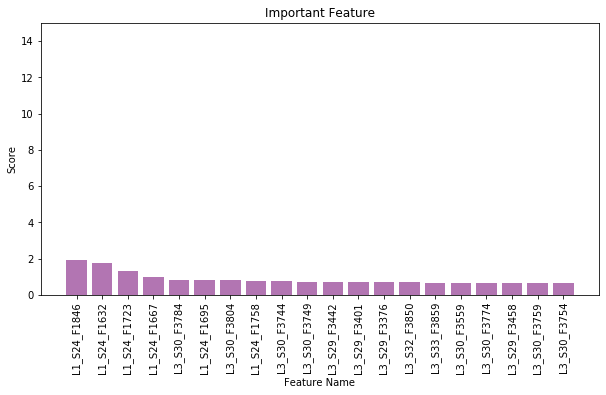

In [14]:
for num in np.arange(1):
    #X_train = getSample()
    y_train = X_train['Response']
    # Replce NAN with "MeanValue"
    X_train=X_train.drop(['Response' ], axis=1).fillna(X_train.mean())
    X_train['Response' ] = y_train
    X_train = X_train.iloc[:,:-1].values
    randorm_forest(X_train, y_train, num)
